In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Our main Column here is Exited, which represents the churn
- 1 means 'yes' for Exited and implies the customer has left
- 0 means 'no' for Exited and implies the customer is still there

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## Basic Data Cleaning, here, is finished.

# Countplot of Churn

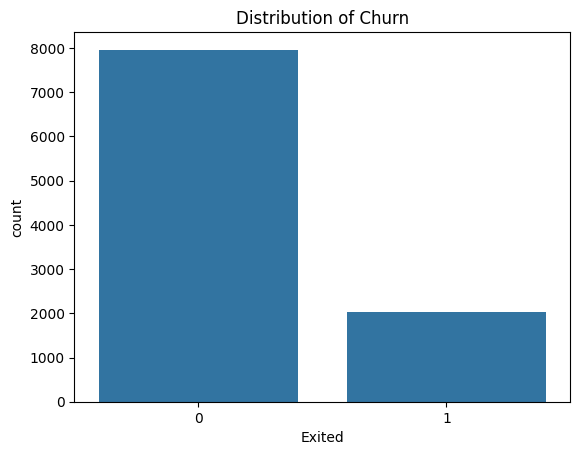

In [9]:
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn')
plt.show()

# Churn by Geography

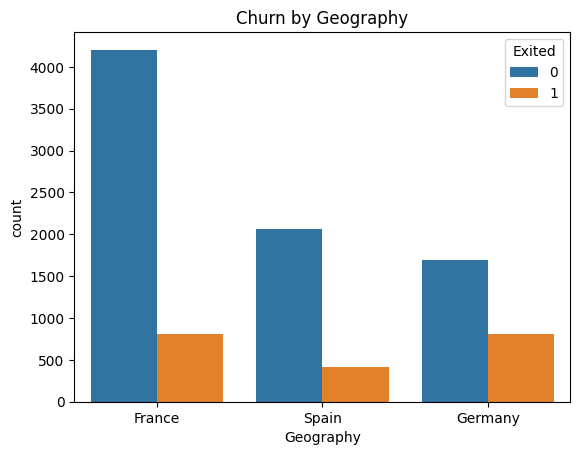

In [10]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

# Churn by Gender

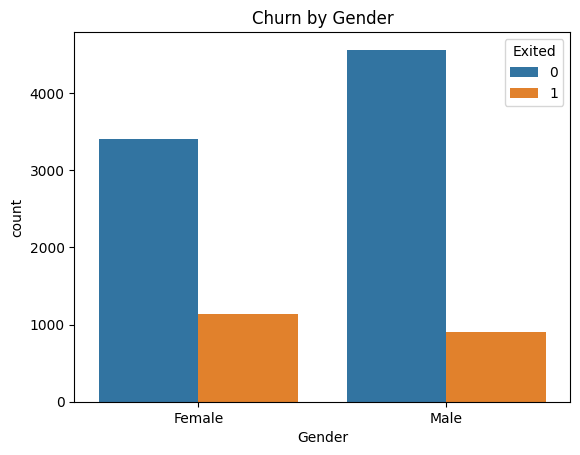

In [11]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

# Age Distribution by Churn

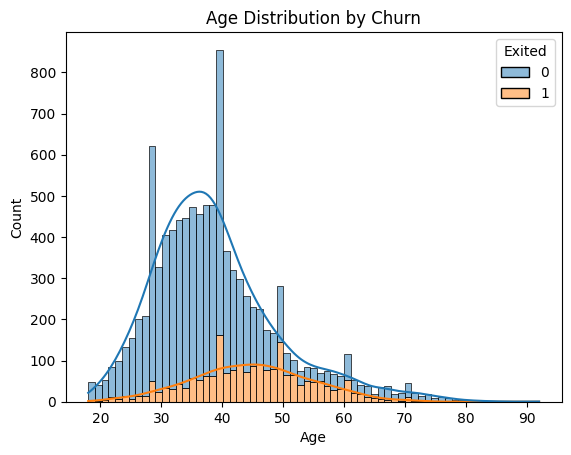

In [12]:
sns.histplot(data=df, x='Age', hue='Exited', kde=True, multiple='stack')
plt.title('Age Distribution by Churn')
plt.show()

# Correlation Heatmap

#### selecting only numeric columns for the correlation matrix

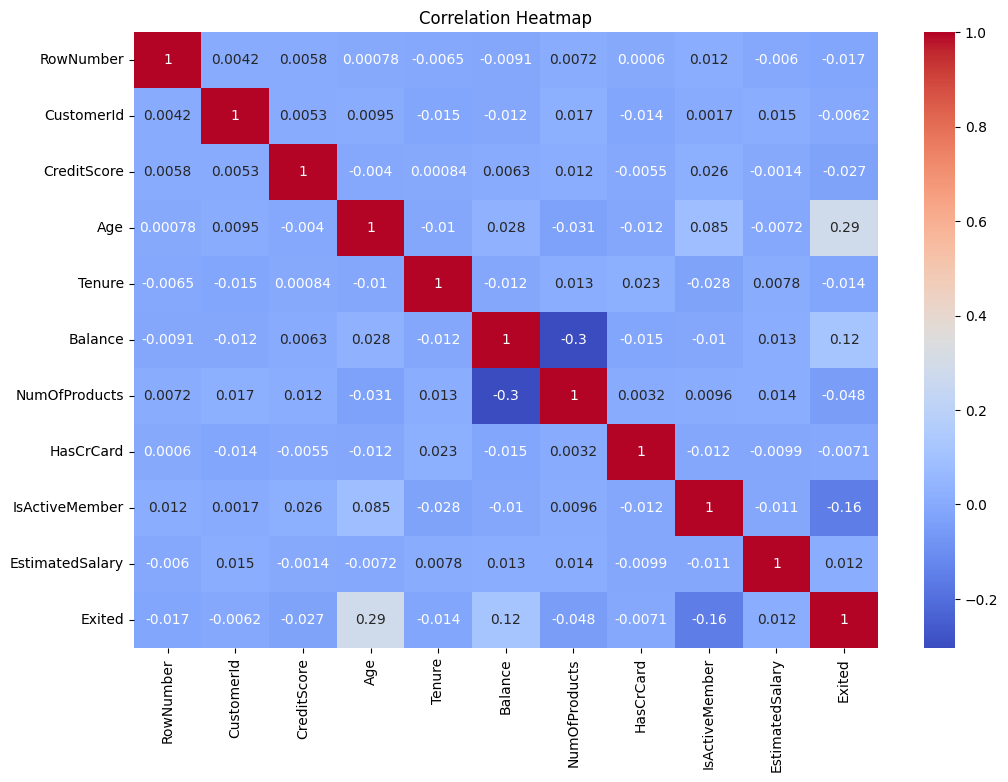

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Balance Vs. Estimated Salary

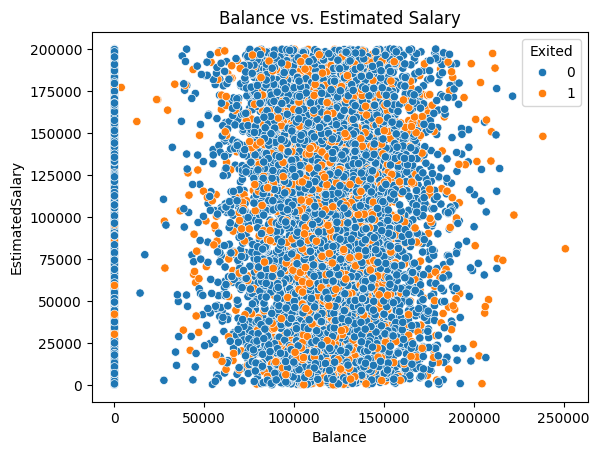

In [16]:
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', data=df)
plt.title('Balance vs. Estimated Salary')
plt.show()

## Pairplot

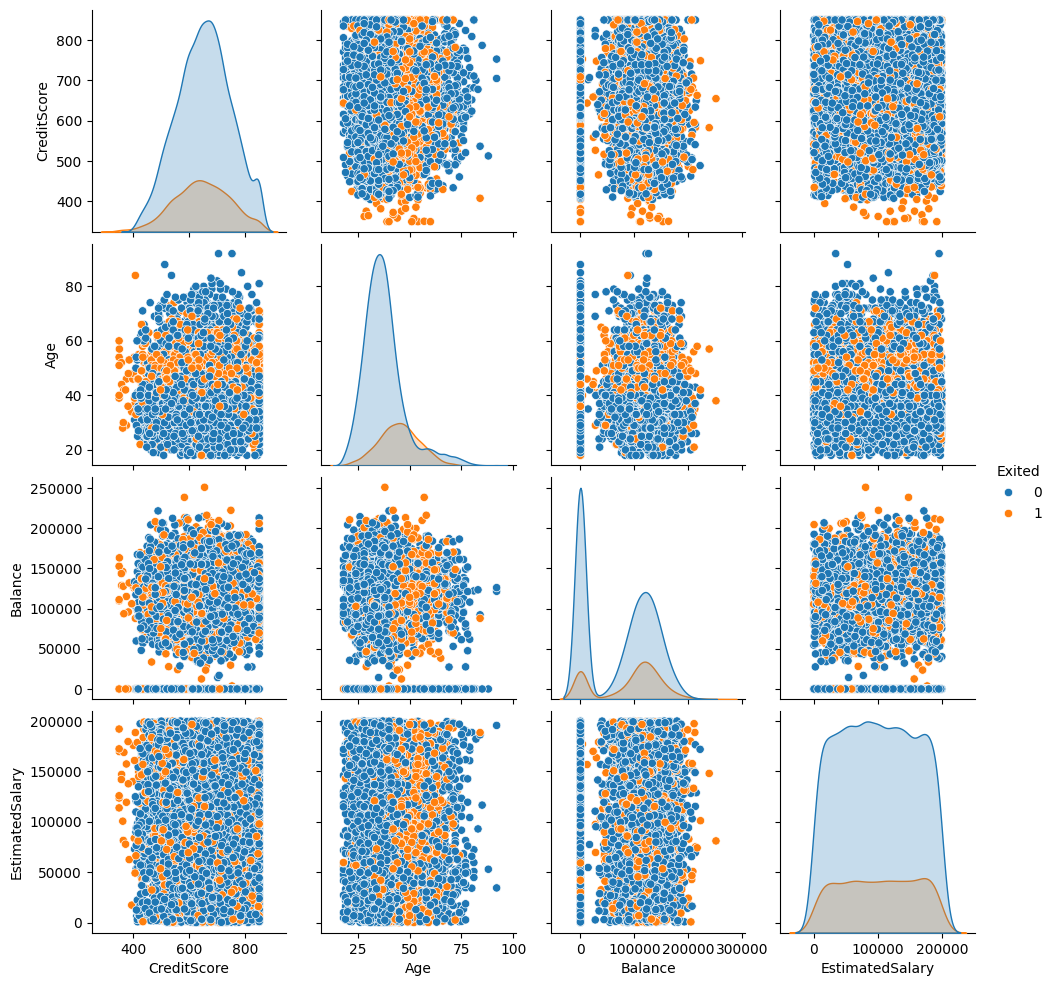

In [18]:
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()

## Box plot of Credit Score by Churn

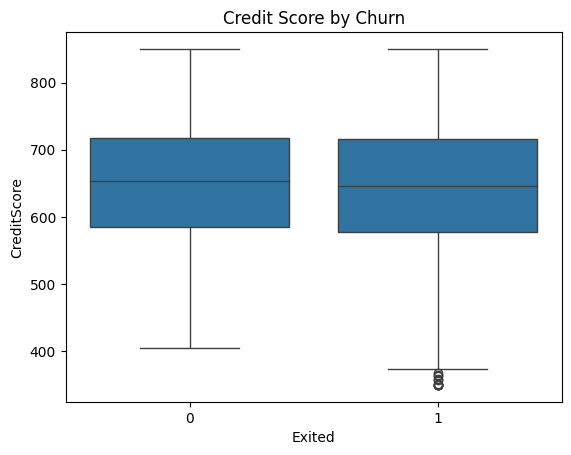

In [19]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score by Churn')
plt.show()

# END OF VISUALISATIONS

## Converting some Categorical Variables to Numerical Values

In [20]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df=pd.get_dummies(df, columns = ['Geography'], drop_first=True)

## Feature Selection

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [25]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [26]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain'] 

#### Note : We do not select Exited Column because this is the one we want to Predict.

In [27]:
X=df[features]
Y=df['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### We split the data into 20% for testing data and 80% for the training data.
### random_state is the parameter we use so that we can replicate the results in the future.

# Feature Scaling 
### A Technique to standardize the range of Independent Variables or Features of our data.
### It Ensures that all our features are on the similar scale.

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.51250172,  0.90911166, -0.67729931, -0.69844549,  0.30084641,
          0.80510537, -1.57810057, -1.0502616 , -0.99096946,  1.73668

##### The above arrays show how the first five rows of the training and the testing data of the features, separately, after Standardization of the values on a similar scale.

In [34]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

##### n_estimators tells the number of random forest trees that will be created
##### As this increases, the model's performance improves by reducing variance. However, a too high value computationally slows down the program.
##### random_state is a seed for the random number generator used in the algorithm.
##### Without a set random_state, the random number generator will use a different seed each time the code is run.

In [35]:
Y_pred=model.predict(X_test)

In [36]:
conf_matrix=confusion_matrix(Y_test, Y_pred)
class_report=classification_report(Y_test, Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)

## Confusion Matrix

In [37]:
print (conf_matrix)

[[1554   53]
 [ 209  184]]


##### Confusion Matrix is a table that is used to evaluate the performance of a classification model
##### It shows the Counterfactuals (actual labels) vs the predicted classifications by the model.

## Classification Report

In [38]:
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



- PRECISION for positive class is the ratio of correctly predicted positive instances to the total positive instances.
- RECALL is the ratio of correctly predicted positive instances to the total of all the actual positive instances.
- F1 SCORE is the harmonic mean of precision and recall.

#### Here, we have precision of 88% for non churn values, that is for customers who stayed, and precison of 78% for customers who exited/churned.
#### Recall of 97% in correctly identifying 0 instances.
#### Support implies that 0 actually occurred 1607 times and 1 for 393 times in the dataset.

## Accuracy

In [39]:
print(accuracy)

0.869


##### Accuracy is the ratio of the correctly predicted instances to the total predicted instances.
##### Here we have approximately achieved,
## Accuracy achieved through Random Forest Classification is approximately 87%

## Feature Importance

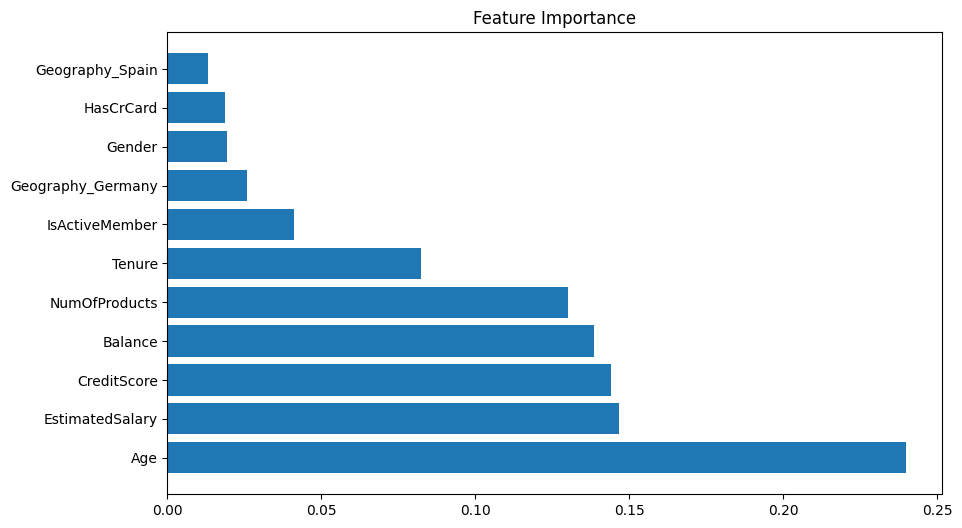

In [46]:
importances = model.feature_importances_
indices=np.argsort(importances)[::-1]
names=[features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

##### Build and Train the Logistic Model.

In [48]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,Y_train)

LogisticRegression(random_state=42)

##### Make Predictions.

In [49]:
Y_pred_log_reg=log_reg.predict(X_test)

##### Evaluate the model.

In [51]:
conf_matrix_log_reg=confusion_matrix(Y_test, Y_pred_log_reg)
class_report_log_reg=classification_report(Y_test, Y_pred_log_reg)
accuracy_log_reg=accuracy_score(Y_test, Y_pred_log_reg)

##### Print the results

### Confusion Matrix

In [53]:
print(conf_matrix_log_reg)

[[1541   66]
 [ 313   80]]


### Classification Report

In [55]:
print (class_report_log_reg)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### Accuracy

In [56]:
print (accuracy_log_reg)

0.8105


## Accuracy achieved through Logistic Regression is approximately 81%.

# Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC

##### Build and train the SVM Model.

In [60]:
svm_model=SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

##### Make Predictions.

In [64]:
Y_pred_svm=svm_model.predict(X_test)

##### Evaluate the Model.

In [69]:
conf_matrix_svm=confusion_matrix(Y_test,Y_pred_svm)
class_report_svm=classification_report(Y_test,Y_pred_svm)
accuracy_svm=accuracy_score(Y_test,Y_pred_svm)

C:\Users\choud\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\choud\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\choud\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

##### On executing the above code for the metrics, we see a Python Warning which indicates that for some labels, this particular model did not predict any samples.
#### As a result, the Precision for these Labels is undefined. This typically happens when the dataset is imbalanced, and some classes have very few or no samples predicted by the model.


##### Print the Results.

## Confusion Matrix

In [70]:
print (conf_matrix_svm)

[[1607    0]
 [ 393    0]]


## Classification report

In [71]:
print (class_report_svm)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



## Accuracy

In [72]:
print (accuracy_svm)

0.8035


## Accuracy achieved through SVM is approximately 80%.

# K - Neighbors Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier

##### Build and train the KNN model.

In [81]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

##### Make Predictions.

In [82]:
Y_pred_knn=knn_model.predict(X_test)

##### Evaluate the Model.

In [83]:
conf_matrix_knn=confusion_matrix(Y_test, Y_pred_knn)
class_report_knn=classification_report(Y_test, Y_pred_knn)
accuracy_knn=accuracy_score(Y_test, Y_pred_knn)

##### Print the Results

## Confusion Matrix

In [84]:
print (conf_matrix_knn)

[[1508   99]
 [ 251  142]]


## Classification Report

In [85]:
print (class_report_knn)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.59      0.36      0.45       393

    accuracy                           0.82      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.80      0.82      0.81      2000



## Accuracy

In [86]:
print(accuracy_knn)

0.825


## Accuracy achieved through KNN is approximately 82%.

# Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

##### Build and train the Gradient Boosting model.

In [87]:
gbm_model=GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

##### Make Predictions.

In [88]:
Y_pred_gbm=gbm_model.predict(X_test)

##### Evaluate the Model.

In [89]:
conf_matrix_gbm=confusion_matrix(Y_test, Y_pred_gbm)
class_report_gbm=classification_report(Y_test,Y_pred_gbm)
accuracy_gbm=accuracy_score(Y_test,Y_pred_gbm)

##### Print the Results

## Confusion Matrix

In [90]:
print(conf_matrix_gbm)

[[1542   65]
 [ 202  191]]


## Classification Report

In [91]:
print(class_report_gbm)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



## Accuracy

In [92]:
print (accuracy_gbm)

0.8665


## Accuracy achieved through Gradient Boosting is approximately 87%.

# Feature Engineering 

In [101]:
df=pd.read_csv('Churn_Modelling.csv')

#### Binary Feature for Balance

In [102]:
df['BalanceZero']=(df['Balance']==0).astype(int)

#### Age Groups

In [103]:
df['AgeGroup']=pd.cut(df['Age'],bins=[18,25,35,45,55,65,75,85,95], labels=['18-25','26-35','36-45','46-55','56-65','66-75','76-85','86-95'])

#### Balance to Salary Ratio

In [104]:
df['BalancetoSalaryRatio']=df['Balance']/df['EstimatedSalary']

#### Interaction Feature between NumOfProducts and IsActiveMember

In [105]:
df['ProductUsage']=df['NumOfProducts']*df['IsActiveMember']

#### Tenure Grouping

In [106]:
df['TenureGroup']=pd.cut(df['Tenure'], bins=[0,2,5,7,10], labels=['0-2','3-5','6-7','8-10'])

### Converting categorical Values to Numerical Values

In [107]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df=pd.get_dummies(df, columns = ['Geography'], drop_first=True)
df['Male-Germany']=df['Gender']*df['Geography_Germany']
df['Male-Spain']=df['Gender']*df['Geography_Spain']

###### Male_Germany and Male_Spain are two new columns we obtain by multiplying the Gender column with the respective Geography Columns, If Gender column contains the Value 1 for a specific record, the product is one, implying male, for our new column, and if it is 0, then the product is 0, implying non-male for the column.

In [108]:
df=pd.get_dummies(df, columns=['AgeGroup','TenureGroup'], drop_first=True)

In [109]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'BalanceZero', 'BalancetoSalaryRatio',
       'ProductUsage', 'Geography_Germany', 'Geography_Spain', 'Male-Germany',
       'Male-Spain', 'AgeGroup_26-35', 'AgeGroup_36-45', 'AgeGroup_46-55',
       'AgeGroup_56-65', 'AgeGroup_66-75', 'AgeGroup_76-85', 'AgeGroup_86-95',
       'TenureGroup_3-5', 'TenureGroup_6-7', 'TenureGroup_8-10'],
      dtype='object')


In [110]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'BalanceZero', 'BalancetoSalaryRatio', 'ProductUsage', 'Geography_Germany', 'Geography_Spain', 'Male-Germany',
       'Male-Spain'] + [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]

In [111]:
X=df[features]
Y=df['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Random Forest Classification

#### With Feature Scaling

In [113]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)

In [114]:
conf_matrix=confusion_matrix(Y_test, Y_pred)
class_report=classification_report(Y_test, Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)

## Confusion Matrix

In [115]:
print (conf_matrix)

[[1548   59]
 [ 211  182]]


## Classification Report

In [116]:
print (class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



## Accuracy

In [117]:
print (accuracy)

0.865


### We have achieved an Accuracy of approximately 87%, again.

## Clearly, There is no Significant improvement after performing feature engineering, but we can see that our model performs consistently.